### In: \AppData\Local\Continuum\anaconda3\Lib\site-packages\fbprophet\hdays.py
### Change
- from holidays import WEEKEND, HolidayBase, easter, rd
#### TO
- from holidays import WEEKEND, HolidayBase
- from dateutil.easter import easter
- from dateutil.relativedelta import relativedelta as rd

In [1]:
from sklearn.metrics import mean_absolute_error

In [3]:
import numpy as np
import pandas as pd
from pandas import Grouper
from pandas import Timestamp
import os
import datetime
import time 
from scipy.stats import boxcox
import itertools
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
# import plotly.offline as py
# py.init_notebook_mode()
%matplotlib inline

In [4]:
import fbprophet
fbprophet.__version__

'0.6'

In [5]:
path = r'C:\Users\u279014\Documents\H_Drive\7.AA Models\1.5 ALM_index_fcst\Data'
ori_file_name = r'FY20 Big Three Dashboard.xlsx'

In [8]:
df = pd.read_excel(os.path.join(path,ori_file_name), sheet_name='ALM - LME+Premium (New)', skiprows=3, usecols=[0,9])
df.columns = ['date', 'ALM']
df.set_index('date', inplace=True)


In [10]:
df[(-df.ALM.isna()) & (df.index >= '2018-06-01')]

,ALM
date,
2018-06-01,1.2538
2018-06-04,1.2826
2018-06-05,1.2740
2018-06-06,1.2737
2018-06-07,1.2631
...,...
2020-09-24,0.9032
2020-09-25,0.9149
2020-09-28,0.9240


In [12]:
df.index

DatetimeIndex(['2018-01-19', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-28', '2020-09-29', '2020-09-30',
               '2020-10-01', '2020-10-02'],
              dtype='datetime64[ns]', name='date', length=691, freq=None)

In [13]:
ts_month = df.resample('M').mean().astype('float')
ts_week = df.resample('W').mean().astype('float')
ts_day = df.resample('D').mean().fillna(method = 'ffill').astype('float')

# Pure on TS data

In [6]:
ts = ts_week.reset_index()
ts.columns = ['ds', 'y']

In [7]:
period = 48
train = ts.iloc[:-period,:]
test = ts.iloc[-period:,:]

In [40]:
train

,ds,y
0,2017-10-08,615
1,2017-10-15,598
2,2017-10-22,589
3,2017-10-29,578
4,2017-11-05,587
...,...,...
87,2019-06-09,601
88,2019-06-16,586
89,2019-06-23,555
90,2019-06-30,518


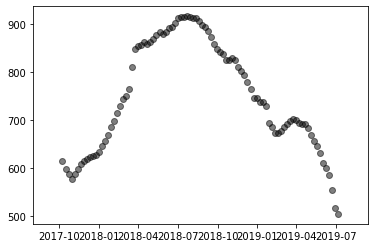

In [9]:
plt.scatter(train.ds, train.y, alpha=0.5, c = 'black')

In [11]:
prophet_basic = Prophet(changepoint_prior_scale=0.08)

In [12]:
prophet_basic.fit(train)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


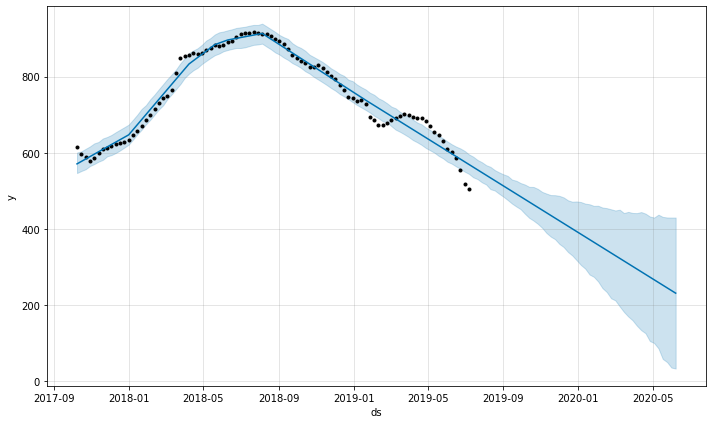

In [13]:
future= prophet_basic.make_future_dataframe(periods=period, freq='W')
forecast=prophet_basic.predict(future)
fig1 =prophet_basic.plot(forecast)

In [37]:
y_class = ['yhat', 'yhat_lower', 'yhat_upper']
col_loc = [forecast.columns.get_loc(x) for x in y_class]

In [38]:
col_loc

[12, 2, 3]

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-08,571.054126,546.890061,600.726884,571.054126,571.054126,0.0,0.0,0.0,0.0,0.0,0.0,571.054126
1,2017-10-15,577.403767,552.337256,603.806526,577.403767,577.403767,0.0,0.0,0.0,0.0,0.0,0.0,577.403767
2,2017-10-22,583.753408,556.878398,610.449864,583.753408,583.753408,0.0,0.0,0.0,0.0,0.0,0.0,583.753408
3,2017-10-29,590.103049,565.365036,616.815424,590.103049,590.103049,0.0,0.0,0.0,0.0,0.0,0.0,590.103049
4,2017-11-05,596.452690,570.574605,624.815126,596.452690,596.452690,0.0,0.0,0.0,0.0,0.0,0.0,596.452690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-05-10,259.837846,86.766154,437.762329,85.280671,434.830234,0.0,0.0,0.0,0.0,0.0,0.0,259.837846
136,2020-05-17,252.798815,59.026137,431.914120,74.388989,433.602066,0.0,0.0,0.0,0.0,0.0,0.0,252.798815
137,2020-05-24,245.759784,50.879761,430.348236,61.952325,430.789231,0.0,0.0,0.0,0.0,0.0,0.0,245.759784
138,2020-05-31,238.720753,36.455741,430.234054,51.225771,429.014501,0.0,0.0,0.0,0.0,0.0,0.0,238.720753


In [22]:
actual_test = test.y.reset_index(drop=True)
predict = forecast.yhat[-period:].reset_index(drop=True)
predict_lower = forecast.yhat_lower[-period:].reset_index(drop=True)
predict_upper = forecast.yhat_upper[-period:].reset_index(drop=True)

In [23]:
rmse_normal = sqrt(mean_squared_error(forecast.yhat[-period:].reset_index(drop=True),test.y.reset_index(drop=True)))
rmse_lower = sqrt(mean_squared_error(forecast.yhat_lower[-period:].reset_index(drop=True),test.y.reset_index(drop=True)))
rmse_upper = sqrt(mean_squared_error(forecast.yhat_upper[-period:].reset_index(drop=True),test.y.reset_index(drop=True)))
print(f'{period} weeks ({int(period/4)}-month) forecast:\nrmse_upper: {rmse_upper} \nrmse_mid: {rmse_normal}\nrmse_lower: {rmse_lower} ')

48 weeks (12-month) forecast:
rmse_upper: 105.35252802882218 
rmse_mid: 172.0194458825503
rmse_lower: 236.76045905051768 


In [24]:
n = 1.6
rmse_upper = sqrt(mean_squared_error(forecast.yhat_upper[-period:int(-period*(4-n)/4)].reset_index(drop=True),test.y[-period:int(-period*(4-n)/4)].reset_index(drop=True)))

In [25]:
print(f'first {len(forecast.yhat_upper[-period:int(-period*(4-n)/4)])} weeks in {int(period/4)} months forecast: ')
print(f'   rmse_upper: {rmse_upper}')

first 20 weeks in 12 months forecast: 
   rmse_upper: 34.222267591001184


In [26]:
boundry_type = predict_upper
print(f'12-Month Forecasting Perforamnce >>>>>>')
print(f'  > first {int(period/4)} weeks accuracy: {100-np.round(np.mean(np.abs((actual_test[:int(period/4)]-boundry_type[:int(period/4)]) / actual_test[:int(period/4)])) * 100,2)}%')
print(f'  > first {int(period/2)} weeks accuracy: {100-np.round(np.mean(np.abs((actual_test[:int(period/2)]-boundry_type[:int(period/2)]) / actual_test[:int(period/2)])) * 100,2)}%')
print(f'  > first {period} periods accracy: {100-np.round(np.mean(np.abs((actual_test-boundry_type) / actual_test)) * 100,2)}%')

12-Month Forecasting Perforamnce >>>>>>
  > first 12 weeks accuracy: 93.3%
  > first 24 weeks accuracy: 93.15%
  > first 48 periods accracy: 83.88%


# Absolute future forecasting, NOT on validation set

In [27]:
period2 = 48 # 1-year prediction
prophet_basic = Prophet()
prophet_basic.fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future= prophet_basic.make_future_dataframe(periods=period2, freq='W')

In [29]:
forecast=prophet_basic.predict(future)

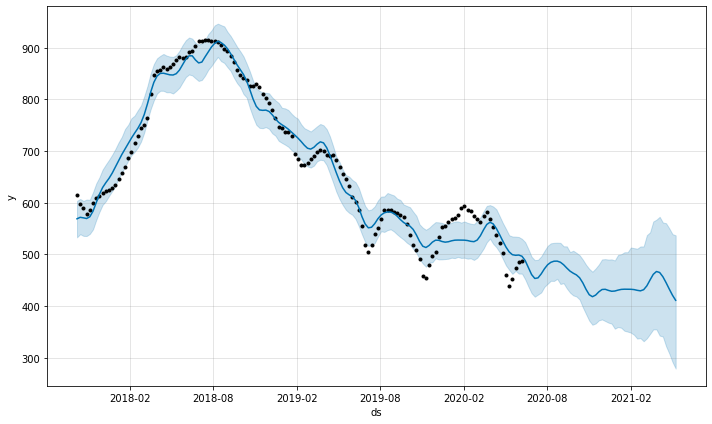

In [30]:
fig1 =prophet_basic.plot(forecast)

In [31]:
forecast.loc[len(forecast)-period2:, :]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
140,2020-06-14,491.916879,451.888668,523.777055,491.916879,491.916879,-3.831822,-3.831822,-3.831822,-3.831822,-3.831822,-3.831822,0.0,0.0,0.0,488.085057
141,2020-06-21,490.094077,437.888861,510.268312,489.694129,490.431811,-15.545623,-15.545623,-15.545623,-15.545623,-15.545623,-15.545623,0.0,0.0,0.0,474.548453
142,2020-06-28,488.271274,424.989986,495.607182,487.111952,489.253471,-27.205456,-27.205456,-27.205456,-27.205456,-27.205456,-27.205456,0.0,0.0,0.0,461.065817
143,2020-07-05,486.448471,418.218277,489.016251,484.386836,488.289267,-32.902922,-32.902922,-32.902922,-32.902922,-32.902922,-32.902922,0.0,0.0,0.0,453.545549
144,2020-07-12,484.625668,422.362789,489.654134,481.458644,487.457747,-29.965277,-29.965277,-29.965277,-29.965277,-29.965277,-29.965277,0.0,0.0,0.0,454.660391
145,2020-07-19,482.802865,426.526206,496.234658,478.264814,486.887469,-20.382699,-20.382699,-20.382699,-20.382699,-20.382699,-20.382699,0.0,0.0,0.0,462.420167
146,2020-07-26,480.980063,437.406293,506.768823,475.417870,486.530774,-8.793583,-8.793583,-8.793583,-8.793583,-8.793583,-8.793583,0.0,0.0,0.0,472.186479
147,2020-08-02,479.157260,443.255099,516.530917,471.891783,485.982640,0.910417,0.910417,0.910417,0.910417,0.910417,0.910417,0.0,0.0,0.0,480.067677
148,2020-08-09,477.334457,449.033983,521.554154,468.007694,485.561499,7.455301,7.455301,7.455301,7.455301,7.455301,7.455301,0.0,0.0,0.0,484.789758
149,2020-08-16,475.511654,448.790978,522.553687,464.211130,485.531805,11.441006,11.441006,11.441006,11.441006,11.441006,11.441006,0.0,0.0,0.0,486.952660


In [32]:
from fbprophet.diagnostics import cross_validation

C:\Users\U279014\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


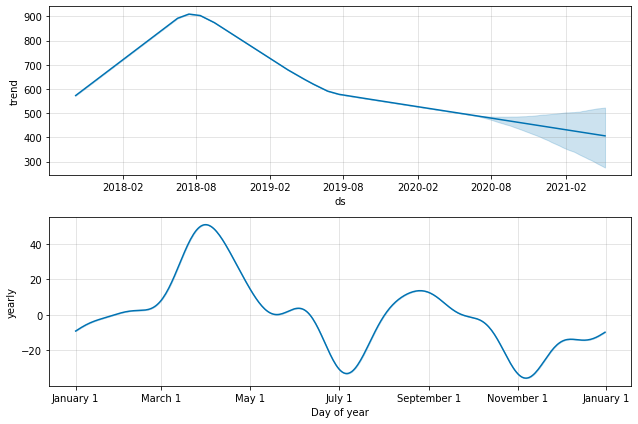

In [33]:
prophet_basic.plot_components(forecast).show()